In [60]:
import pickle 
import numpy 
import ecg_plot
import os
import pandas as pd
import random
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


# HCHS Plotting

In [76]:
dataset_save_path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "PickledData", "hchs")
diseases = ['diabetes', 'insomnia', 'metabolic_syndrome', 'hypertension', 'sleep_apnea']

path_to_condition_to_label_dict = os.path.join(dataset_save_path, 'condition_to_label_dict.pickle')
path_to_pid_to_diseases_dict = os.path.join(dataset_save_path, 'pid_to_diseases_dict.pickle')
path_to_diss_diagrams = "C:\\Users\\Kevalee Shah\\Documents\\Cambridge\\Part II\\Project\\Dissertation\\Diagrams"


In [77]:
with open(path_to_condition_to_label_dict, 'rb') as f:
    condition_to_label_dict = pickle.load(f)
    print(condition_to_label_dict)

{'diabetes': {1: 'Non-diabetic', 2: 'Pre-diabetic', 3: 'Diabetic'}, 'sleep_apnea': {0: 'No', 1: 'Yes'}, 'hypertension': {0: 'No', 1: 'Yes'}, 'metabolic_syndrome': {0: 'No', 1: 'Yes'}, 'insomnia': {1: 'No clinically significant insomnia', 2: 'Subthreshold insomnia', 3: 'Clinical insomnia (moderate severity)', 4: 'Clinical insomnia (severe)'}, 'gender': {0: 'female', 1: 'male'}}


In [78]:
condition_to_label_dict = {'diabetes': {1: 'Non-diabetic', 2: 'Pre-diabetic', 3: 'Diabetic'}, 'sleep_apnea': {0: 'No', 1: 'Yes'}, 'hypertension': {0: 'No', 1: 'Yes'}, 'metabolic_syndrome': {0: 'No', 1: 'Yes'}, 'insomnia': {1: 'No clinically significant', 2: 'Subthreshold', 3: 'Moderate to Severe', 4: 'Clinical insomnia (severe)'}, 'gender': {0: 'female', 1: 'male'}}

In [79]:
def disease_numbers(disease, label_conversion):
    disease_dataset_name = f'{disease}_with_wake_user_datasets.pickle'
    disease_dataset_path = os.path.join(dataset_save_path, disease_dataset_name)
    with open(disease_dataset_path, 'rb') as f:
        user_datasets = pickle.load(f)
    
    numbers = {}
    for patient in user_datasets:
        label = user_datasets[patient][1]
        if label not in label_conversion:
            continue
        converted_label = label_conversion[label]
        if converted_label in numbers:
            numbers[converted_label] += 1
        else:
            numbers[converted_label] = 1
    return numbers

def plot_disease_numbers(count_dict, disease):
    x = count_dict.keys()
    y = count_dict.values()
    plt.figure(figsize=(6,3))
    plt.title(f'Number of Patients with Each Class of {disease}')
    plt.xlabel(f'{disease} status')
    plt.xticks(rotation=21)
    plt.ylabel('Number of Patients')
    plt.bar(x, y, width=0.5,color='cyan')
    plt.savefig(os.path.join(path_to_diss_diagrams, f'hchs_{disease}_numbers.pdf'), bbox_inches='tight')

In [80]:
disease = 'hypertension'
label_conversion = condition_to_label_dict[disease]
print(disease_numbers(disease, label_conversion))

{'Yes': 474, 'No': 1412}


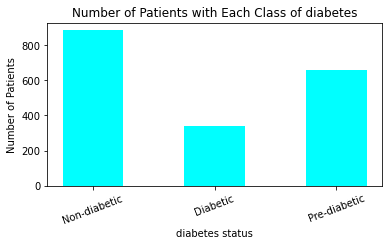

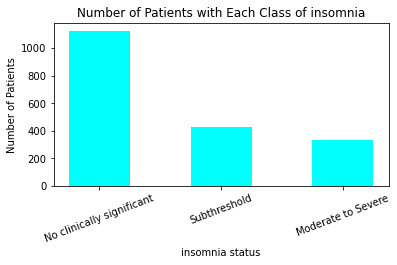

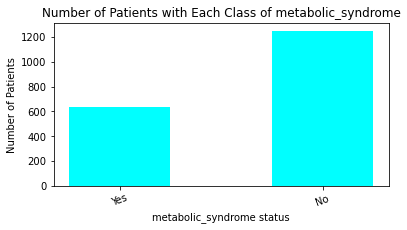

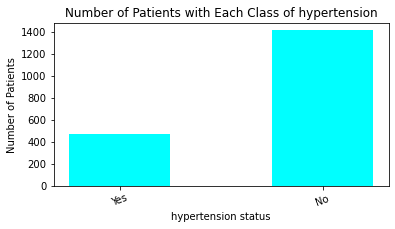

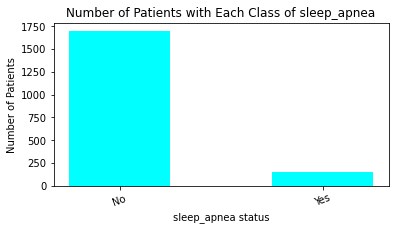

In [81]:
for disease in diseases:
    label_conversion = condition_to_label_dict[disease]
    count_dict = disease_numbers(disease, label_conversion)
    plot_disease_numbers(count_dict, disease)    

# MESA Plotting

In [82]:
dataset_save_path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "PickledData", "mesa")
diseases = ['insomnia','sleep_apnea']

path_to_diss_diagrams = "C:\\Users\\Kevalee Shah\\Documents\\Cambridge\\Part II\\Project\\Dissertation\\Diagrams"

condition_to_label_dict = {'sleep_apnea': {0: 'No', 1: 'Yes'}, 'insomnia': {0: 'No', 1: 'Yes'}}


In [83]:
def plot_disease_numbers(count_dict, disease):
    x = count_dict.keys()
    y = count_dict.values()
    plt.figure(figsize=(6,3))
    plt.title(f'Number of Patients with Each Class of {disease}')
    plt.xlabel(f'{disease} status')
    plt.xticks(rotation=21)
    plt.ylabel('Number of Patients')
    plt.bar(x, y, width=0.4,color='orange')
    plt.savefig(os.path.join(path_to_diss_diagrams, f'mesa_{disease}_numbers.pdf'), bbox_inches='tight')

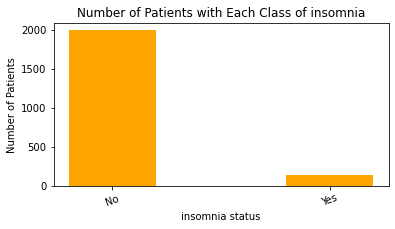

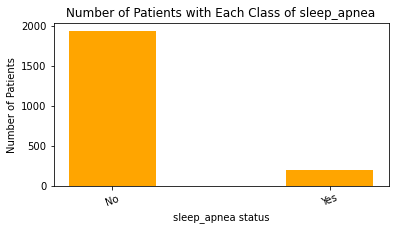

In [84]:
for disease in diseases:
    label_conversion = condition_to_label_dict[disease]
    count_dict = disease_numbers(disease, label_conversion)
    plot_disease_numbers(count_dict, disease)    

In [163]:
def actigraphy(disease):
    disease_dataset_name = f'{disease}_with_wake_user_datasets.pickle'
    disease_dataset_path = os.path.join(dataset_save_path, disease_dataset_name)
    with open(disease_dataset_path, 'rb') as f:
        user_datasets = pickle.load(f)

    keys = list(user_datasets.keys())
    sample_key = keys[32]
    print(sample_key)

    data, label = user_datasets[sample_key]
    data = data[:3000]
    
    fig, axs = plt.subplots(3, 2, figsize=(15, 10), sharex='col')
    column_types = ["activity", "whitelight", "bluelight", "greenlight", "redlight", "wake"]
    y_label = ["activity count", "whitelight level", "bluelight level", "greenlight level", "redlight level", "awake or asleep"]
    colors = ['b', 'g', 'r', 'c', 'm', 'y']
    for i, ax in enumerate(axs.flatten()):
        y = data[:, i]
        x = list(range(len(y)))
        if i == 5:
            ax.scatter(x, y, label=column_types[i], c=colors[i])
        else:
            ax.plot(x, y, label=column_types[i], c=colors[i])

        ax.set_ylabel(y_label[i],fontsize='large')
        ax.set_xlabel('time', fontsize='large')
    
    plt.suptitle(f'Representation of Actigraphy Data from MESA Participant {sample_key}',fontsize='xx-large')
    plt.savefig(os.path.join(path_to_diss_diagrams, f'{sample_key}_mesa_actigraphy_plot.pdf'))
        




101


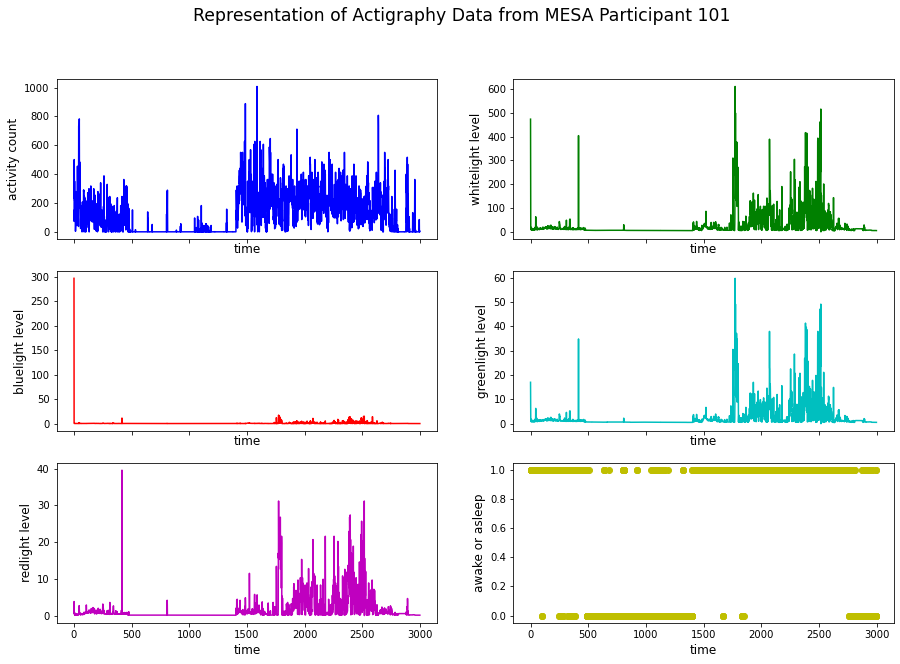

In [164]:
actigraphy('insomnia')